# Airline Safety Visualization Project

# Mary Donovan Martello

## The goal of this project was to effectively tell a story with data to different types of audiences. The topic was to examine airline safety data, determine how safe current airline travel is, and tell the story to an internal data science audience, internal executive audience, and to an external audience via a blog, an infographic, and a presentation.  This notebook includes the code for the executive summary to internal senior leadership.

# Task 2:  Executive Summary to Senior Leadership

In [1]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import squarify    
from collections import defaultdict
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
import plotly.express as px
from matplotlib.ticker import ScalarFormatter
from matplotlib.patches import Ellipse
from matplotlib.text import OffsetFrom
from matplotlib.lines import Line2D
from matplotlib.ticker import FuncFormatter

# Plotting pretty figures and avoid blurry images
#%config InlineBackend.figure_format = 'retina'
# Larger scale for plots in notebooks
#sns.set_context('talk')

In [2]:
#import data
bill = pd.read_excel('640Calcs.xlsx', sheet_name=5)
depart = pd.read_excel('640Calcs.xlsx', sheet_name=7)
airline = pd.read_excel('air_incidents_byairline.xlsx')
airlineFatY = pd.read_excel('airline-safety_byairline.xlsx')
usWorld = pd.read_excel('640Calcs.xlsx', sheet_name=4)
smSourc = pd.read_excel('640Calcs.xlsx', sheet_name=8)
smFreq = pd.read_excel('640Calcs.xlsx', sheet_name=9)
fatal = pd.read_excel('AirlineFatalsbyYear.xlsx')
rev = pd.read_excel('640Calcs.xlsx', sheet_name=10)

In [9]:
bill.head()

,Year,Vehicle Miles,Air Miles
0,2000,152.693848,12.847213
1,2001,150.915594,81.479168
2,2002,150.577731,0.000000
3,2003,148.387543,3.346909
4,2004,144.472175,1.771134


### Auto Fatality Rate Much Higher than Air Fatality Rate

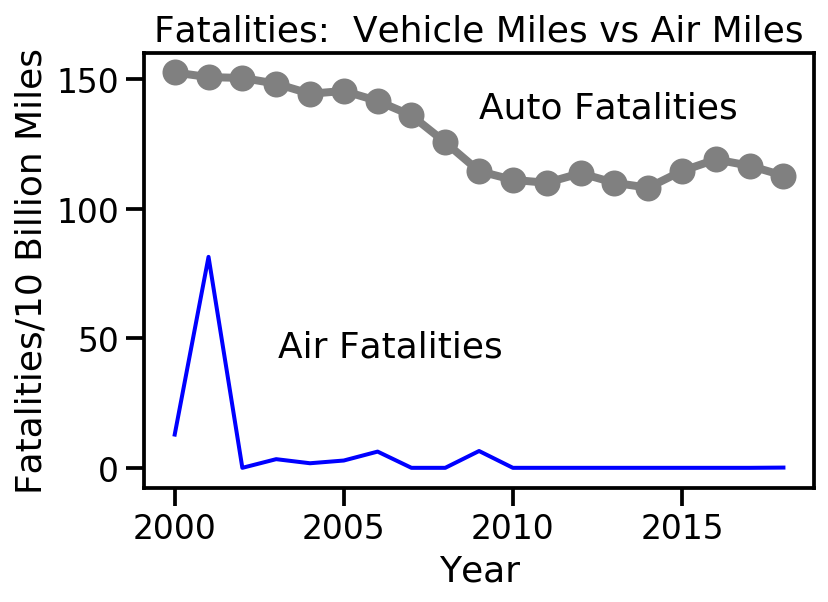

In [238]:
fig, ax = plt.subplots()
ax.text(0.2, 0.3, 'Air Fatalities', transform=ax.transAxes)
ax.text(0.5, 0.85, 'Auto Fatalities', transform=ax.transAxes)
ax.plot(bill.Year, bill['Air Miles'], marker='', color='blue', linewidth=2)
ax.plot(bill.Year, bill['Vehicle Miles'], marker='o', markerfacecolor='grey', markersize=12, color='grey', linewidth=4)
# set details of the graph
ax.set(xlabel='Year', ylabel='Fatalities/10 Billion Miles',
       title='Fatalities:  Vehicle Miles vs Air Miles')


plt.show()

In [73]:
#import data
depart = pd.read_excel('640Calcs.xlsx', sheet_name=7)

In [74]:
depart.head()

,Year,Passenger Departures in Millions,Fatalities
0,2013,3143000,265
1,2014,3327000,990
2,2015,3561000,560
3,2016,3810000,325
4,2017,4093000,59


### Rate of Air Travel is Increasing

Text(0.5, 1.0, 'Air Passenger Departures')

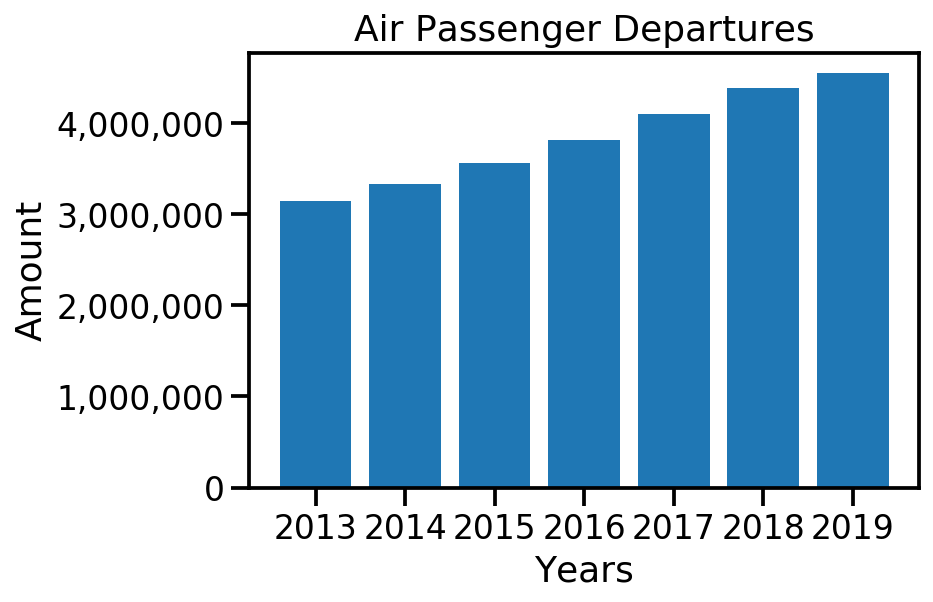

In [221]:
fig, ax = plt.subplots()
# set x axis points
pos = np.arange(len(depart['Year']))
# create separate bars
b1 = plt.bar(pos+0.25, depart['Passenger Departures in Millions'])
b2 = plt.bar(pos+0.25, depart['Fatalities'])

# set details of the graph
ax.get_yaxis().set_major_formatter(
    FuncFormatter(lambda y, p: format(int(y), ',')))
plt.xticks(pos+0.25, depart['Year'], rotation='horizontal')
plt.ylabel('Departures')
plt.xlabel('Years')
plt.title('Air Passenger Departures')


In [209]:
from matplotlib.ticker import FuncFormatter

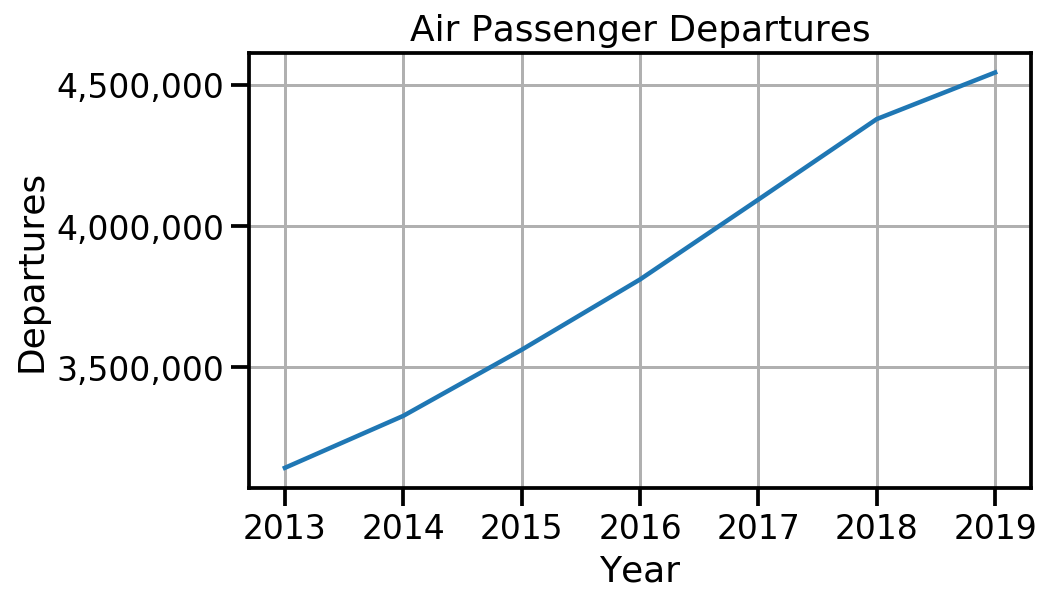

In [222]:
# set up plot
fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(depart['Year'], depart['Passenger Departures in Millions'])
# set details of the graph
ax.get_yaxis().set_major_formatter(
    FuncFormatter(lambda y, p: format(int(y), ',')))
ax.set(xlabel='Year', ylabel='Departures',
       title='Air Passenger Departures')
ax.grid()
plt.show()

In [177]:
fatal = pd.read_excel('AirlineFatalsbyYear.xlsx')

In [178]:
fatal.head()

,Year,Accidents,Fatalities
0,1970,47,1400
1,1971,38,1429
2,1972,56,2432
3,1973,50,2226
4,1974,46,2068


In [179]:
fatal.shape

(51, 3)

In [180]:
fatal.tail()

,Year,Accidents,Fatalities
46,2016,11,288
47,2017,5,31
48,2018,11,542
49,2019,14,267
50,2020,1,176


### Air Fatalities Down As Air Miles Increase

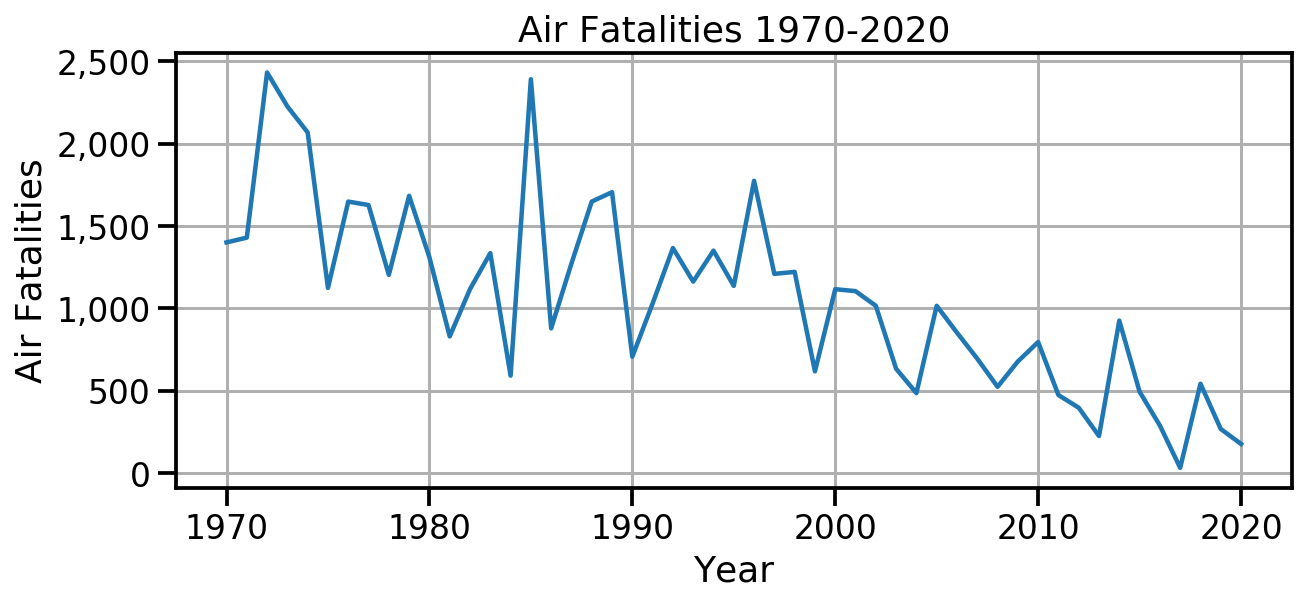

In [223]:
# set up plot
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(fatal.Year, fatal.Fatalities)
# set details of the graph
ax.get_yaxis().set_major_formatter(
    FuncFormatter(lambda y, p: format(int(y), ',')))
ax.set(xlabel='Year', ylabel='Air Fatalities',
       title='Air Fatalities 1970-2020')
ax.grid()
plt.show()

In [113]:
airlineFatY = pd.read_excel('airline-safety_byairline.xlsx')

In [97]:
airline = pd.read_excel('air_incidents_byairline.xlsx')

In [98]:
airline.head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,aer lingus,320906734,2,0,0,0,0,0
1,aeroflot*,1197672318,76,14,128,6,1,88
2,aerolineas argentinas,385803648,6,0,0,1,0,0
3,aeromexico*,596871813,3,1,64,5,0,0
4,air canada,1865253802,2,0,0,2,0,0


In [106]:
airlineFatY.shape

(24, 8)

### US Airlines Safer than Foreign Airlines

Text(0.5, 1.0, 'Fatalities by Airline 2000-2014')

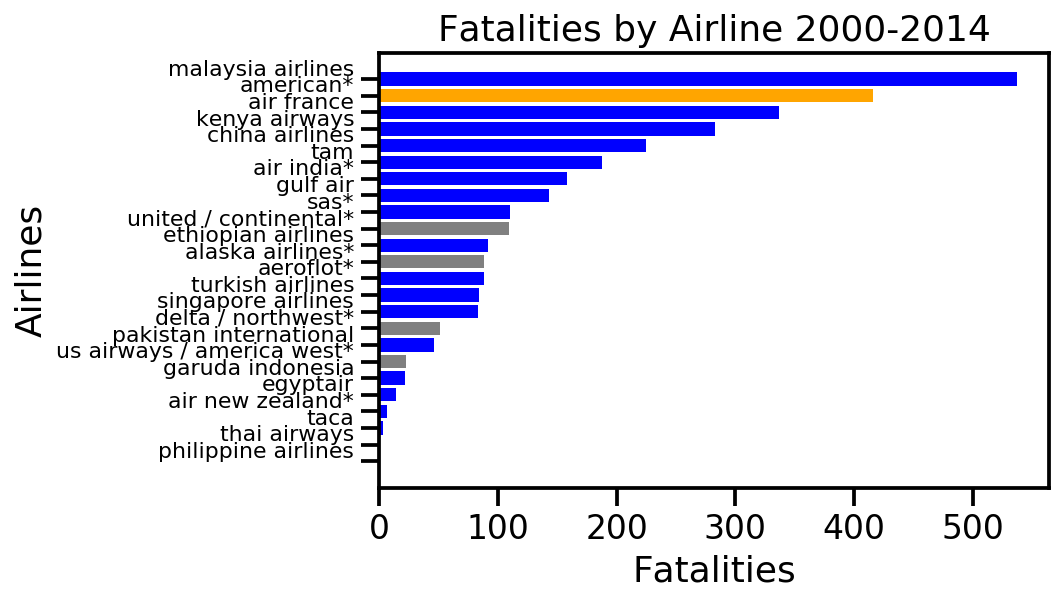

In [283]:
# set x axis points
pos = np.arange(len(airlineFatY['airline']))
yLab = airlineFatY['airline'].tolist()
# horizontal bars
plt.barh(pos, airlineFatY['fatalities_00_14'], align='center', color=['blue', 'blue', 'blue', 'blue', 'blue', 'blue',
                                                                      'grey', 'blue', 'grey', 'blue', 'blue', 'blue',
                                                                      'grey', 'blue', 'grey', 'blue', 'blue', 'blue', 
                                                                      'blue', 'blue', 'blue', 'blue', 'orange', 'blue'
                                                                     ])
# set details of the graph
plt.yticks(pos, airlineFatY['airline'], rotation = (0), fontsize = 11, va='bottom', ha='right')
plt.ylabel("Airlines")
plt.xlabel('Fatalities')
plt.title('Fatalities by Airline 2000-2014')

In [194]:
usWorld = pd.read_excel('640Calcs.xlsx', sheet_name=4)

In [195]:
usWorld.head()

,Year,US Fatalities,World Fatalities
0,2000,89,1148
1,2001,531,1144
2,2002,0,1112
3,2003,22,705
4,2004,13,552


[Text(0, 0.5, 'Fatalities'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Domestic Airlines vs Foreign Airlines:  Fatalities')]

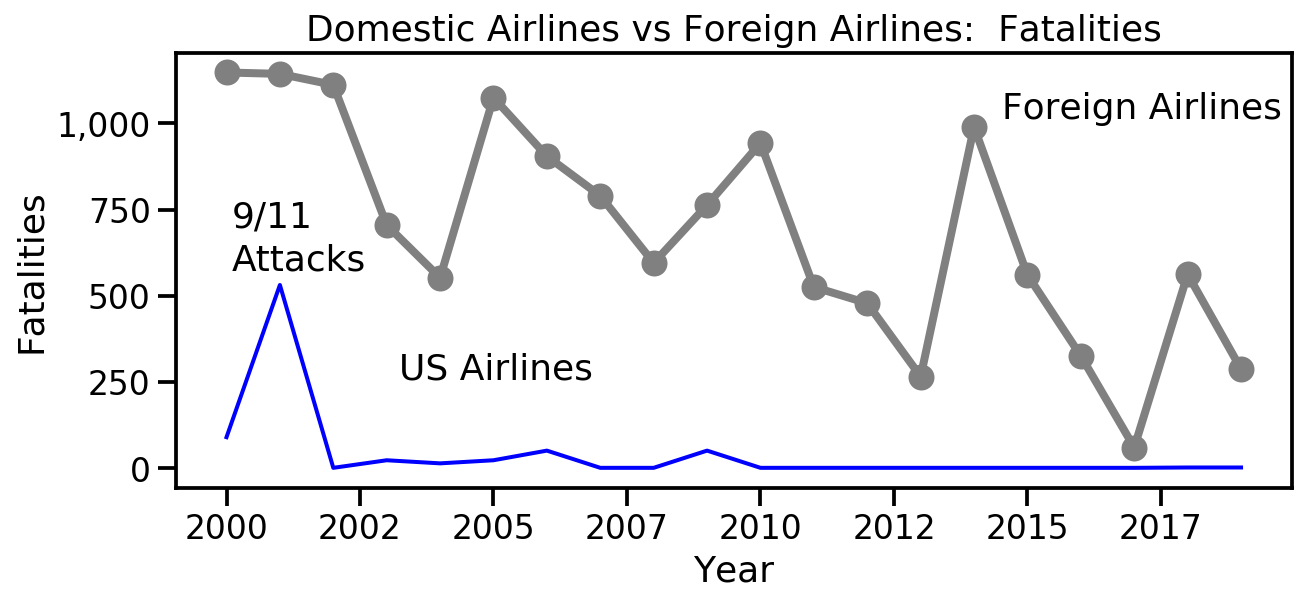

In [296]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.text(0.05, 0.6, '9/11', transform=ax.transAxes)
ax.text(0.05, 0.5, 'Attacks', transform=ax.transAxes)
ax.text(0.2, 0.25, 'US Airlines', transform=ax.transAxes)
ax.text(0.74, 0.85, 'Foreign Airlines', transform=ax.transAxes)
ax.plot(usWorld.Year, usWorld['US Fatalities'], marker='', color='blue', linewidth=2)
ax.plot(usWorld.Year, usWorld['World Fatalities'], marker='o', markerfacecolor='grey', markersize=12, color='grey', linewidth=4)
# set details of the graph
ax.get_yaxis().set_major_formatter(
    FuncFormatter(lambda y, p: format(int(y), ',')))
tick_labels = ('2000', '2000', '2002', '2005', '2007', '2010', '2012', '2015', '2017')
ax.set_xticklabels(tick_labels)
ax.set(xlabel='Year', ylabel='Fatalities',
       title='Domestic Airlines vs Foreign Airlines:  Fatalities')

Revenue

In [200]:
rev = pd.read_excel('640Calcs.xlsx', sheet_name=10)

In [201]:
rev.head()

,Year,Domestic
0,2000,98899811
1,2001,86519991
2,2002,79287478
3,2003,88870096
4,2004,100902510


In [202]:
rev.shape

(21, 2)

### COVID-19 is a Short-Term Revenue Threat

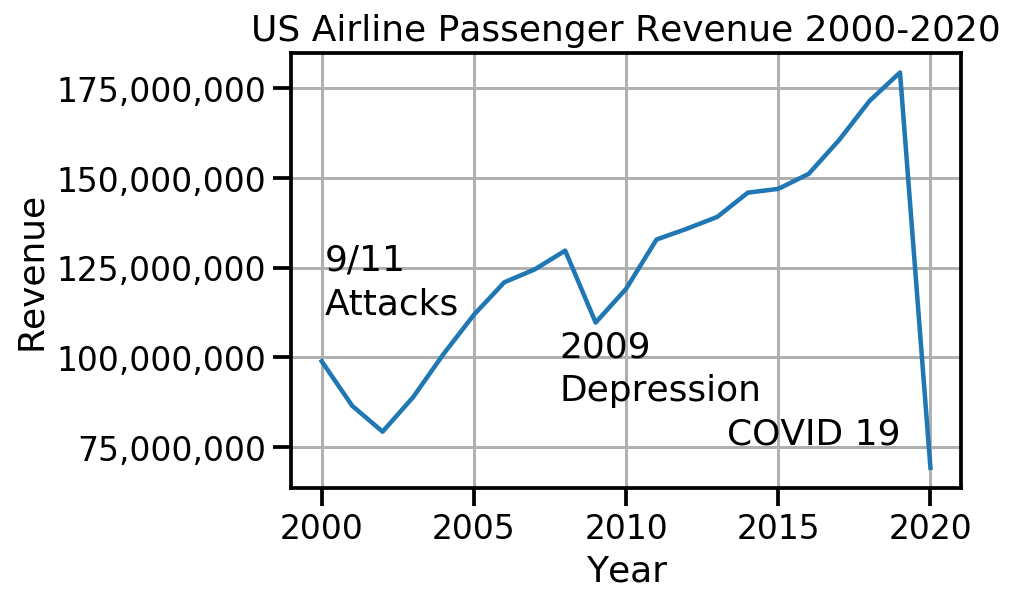

In [250]:
# set up plot
fig, ax = plt.subplots()
ax.text(0.05, 0.5, '9/11', transform=ax.transAxes)
ax.text(0.05, 0.4, 'Attacks', transform=ax.transAxes)
ax.text(0.4, 0.3, '2009', transform=ax.transAxes)
ax.text(0.4, 0.2, 'Depression', transform=ax.transAxes)
ax.text(0.65, 0.1, 'COVID 19', transform=ax.transAxes)
ax.plot(rev.Year, rev.Domestic)
ax.ticklabel_format(useOffset=False, style='plain')
# set details of the graph
ax.get_yaxis().set_major_formatter(
    FuncFormatter(lambda y, p: format(int(y), ',')))
ax.set(xlabel='Year', ylabel='Revenue',
       title='US Airline Passenger Revenue 2000-2020')
ax.grid()
plt.show()

## Social Media

In [164]:
smSourc = pd.read_excel('640Calcs.xlsx', sheet_name=8)
smFreq = pd.read_excel('640Calcs.xlsx', sheet_name=9)

In [160]:
smSourc.head()

,Generation,Daily,Few Times Per Week,Once Per Week,Few Times Per Month,Once Per Month,Less Than Once Per Month,Never
0,Gen Z,0.61,0.17,0.07,0.00,0.03,0.04,0.08
1,Millennial,0.57,0.18,0.03,0.04,0.04,0.04,0.10
2,Gen X,0.48,0.16,0.04,0.03,0.01,0.07,0.21
3,Boomers,0.34,0.11,0.05,0.06,0.03,0.05,0.36


In [161]:
smSourc.shape

(4, 8)

In [165]:
smFreq.head()

,Year,Often,Sometimes,Hardly Ever,Never
0,2016,0.18,0.26,0.18,0.38
1,2017,0.20,0.27,0.20,0.33
2,2018,0.20,0.27,0.21,0.32
3,2019,0.28,0.26,0.19,0.27


In [163]:
smFreq.shape

(4, 5)

In [255]:
import matplotlib.ticker as mtick

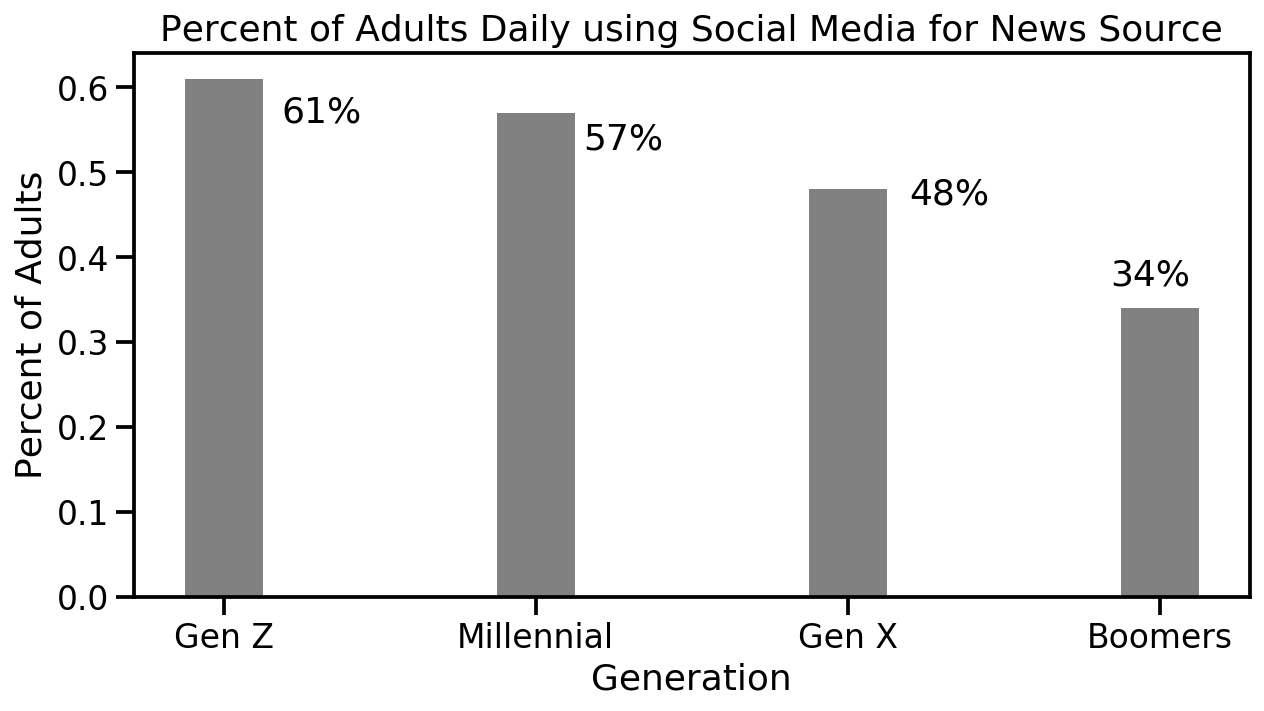

In [281]:
# set up the figure size

fig = plt.figure(figsize=(10, 5))
fig.text(0.4, 2.0, '61%', transform=ax.transAxes)
fig.text(1.0, 1.9, '57%', transform=ax.transAxes)
fig.text(1.65, 1.7, '48%', transform=ax.transAxes)
fig.text(2.05, 1.4, '34%', transform=ax.transAxes)
# set x axis points
pos = np.arange(len(smSourc['Generation']))
vals = (61, 57, 48, 34)
# create three separate bars
plt.bar(pos, smSourc['Daily'], width=0.25, color='grey')

# set details of the graph
plt.xticks(pos, smSourc['Generation'], rotation='horizontal')
plt.ylabel('Percent of Adults')
plt.xlabel('Generation')
plt.title('Percent of Adults Daily using Social Media for News Source')

plt.show()

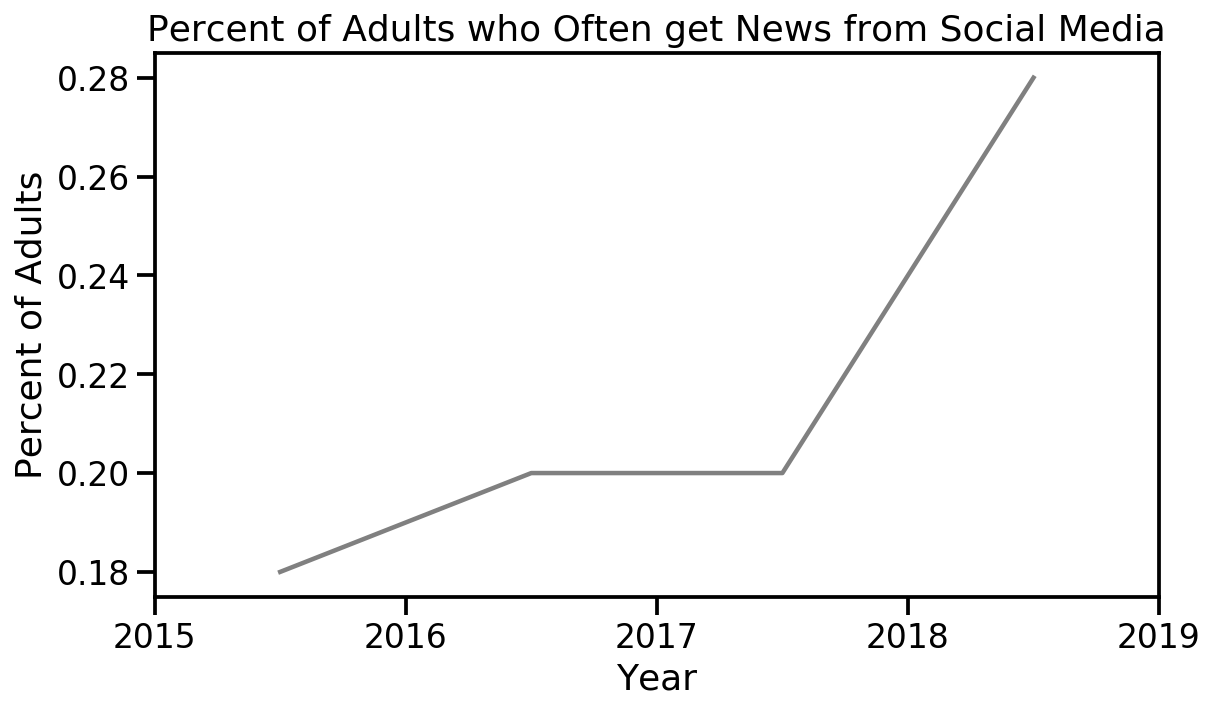

In [291]:
# set up plot
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(smFreq.Year, smFreq.Often, color = 'grey')
# set details of the graph
tick_labels = ('2015', '2016', '2017', '2018', '2019')
ax.set_xticklabels(tick_labels)
ax.set_xticks(ax.get_xticks()[::2])
ax.set(xlabel='Year', ylabel='Percent of Adults',
       title='Percent of Adults who Often get News from Social Media')

plt.show()